In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import itertools
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv(r'/content/df_features_din.csv')
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
#SVM MODEL

model_svm = SVC(random_state=1)
model_svm.fit(x_train, y_train)
y_pred_svm = model_svm.predict(x_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79      2172
           1       0.88      0.78      0.83      3050

    accuracy                           0.81      5222
   macro avg       0.81      0.82      0.81      5222
weighted avg       0.82      0.81      0.81      5222



0.8127154346993489

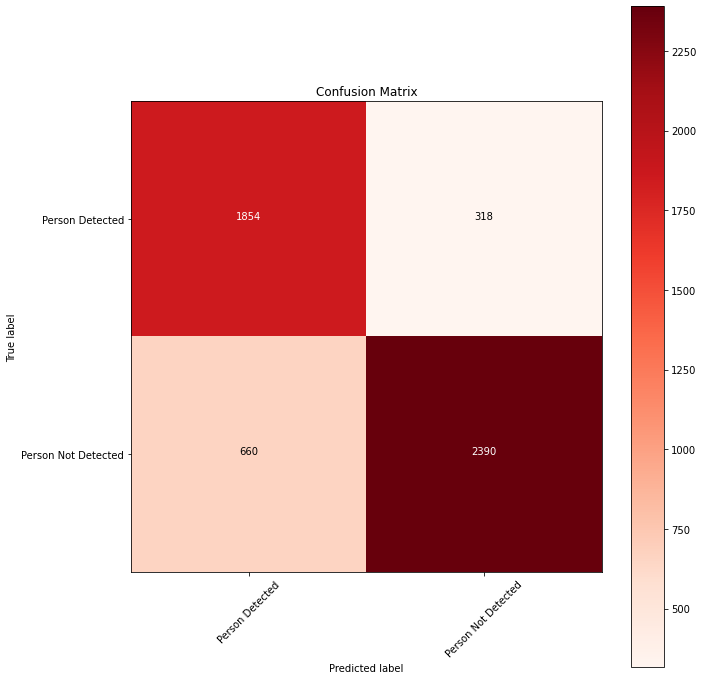

In [ ]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_test, y_pred_svm)
target_names = ["Person Detected", "Person Not Detected"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_test, y_pred_svm)


roc_auc_score for SVM:  0.8185988587990218


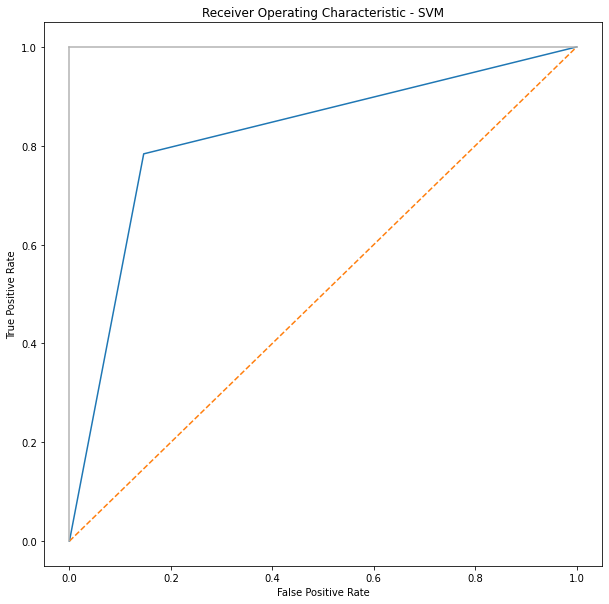

In [ ]:
# plot for SVM
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred_svm)
print('roc_auc_score for SVM: ', roc_auc_score(y_test, y_pred_svm))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#RandomForestClassifier(ensemble) model

model_RFC = RandomForestClassifier(random_state = 1)
model_RFC.fit(x_train, y_train)
y_pred_RFC = model_RFC.predict(x_test)
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      2172
           1       0.90      0.82      0.86      3050

    accuracy                           0.84      5222
   macro avg       0.84      0.85      0.84      5222
weighted avg       0.85      0.84      0.84      5222



0.8406740712370739

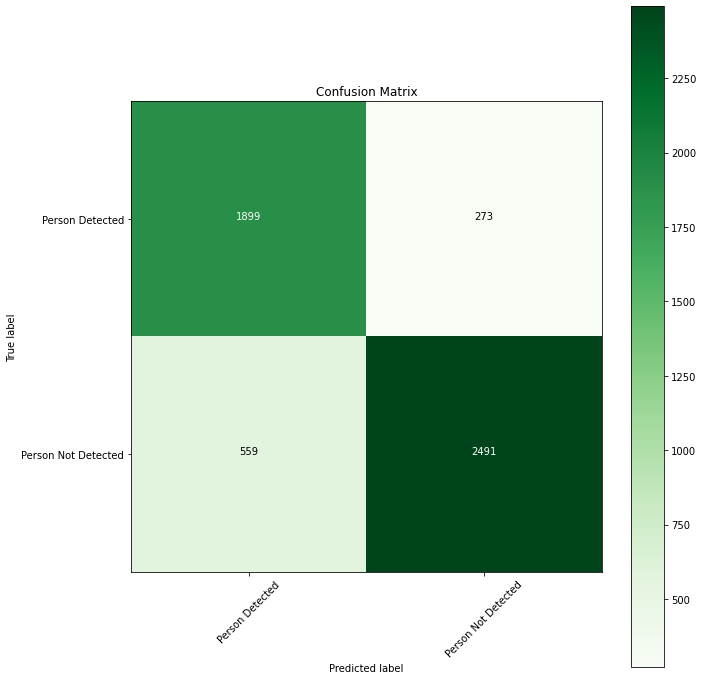

In [ ]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_test, y_pred_RFC)
target_names = ["Person Detected", "Person Not Detected"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_test, y_pred_RFC)


roc_auc_score for RFC:  0.8455153518703015


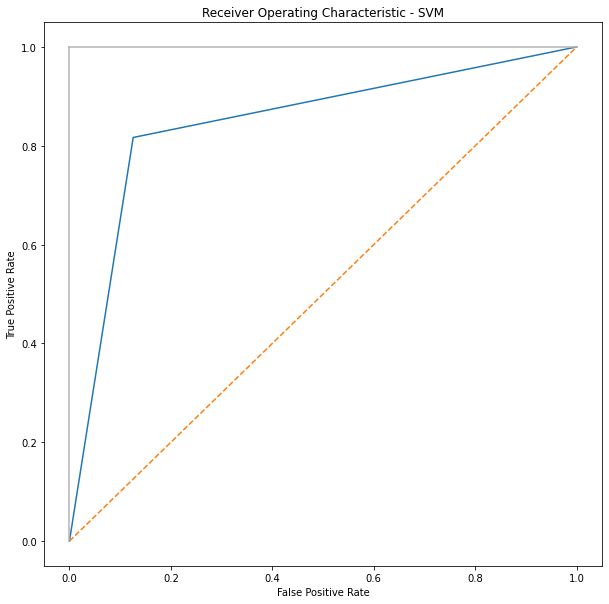

In [ ]:
# plot for RFC
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred_RFC)
print('roc_auc_score for RFC: ', roc_auc_score(y_test, y_pred_RFC))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#KNN model

model_KNN = KNeighborsClassifier()
model_KNN.fit(x_train, y_train)
y_pred_KNN = model_KNN.predict(x_test)
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79      2172
           1       0.88      0.78      0.83      3050

    accuracy                           0.81      5222
   macro avg       0.81      0.81      0.81      5222
weighted avg       0.82      0.81      0.81      5222



0.8094599770202987

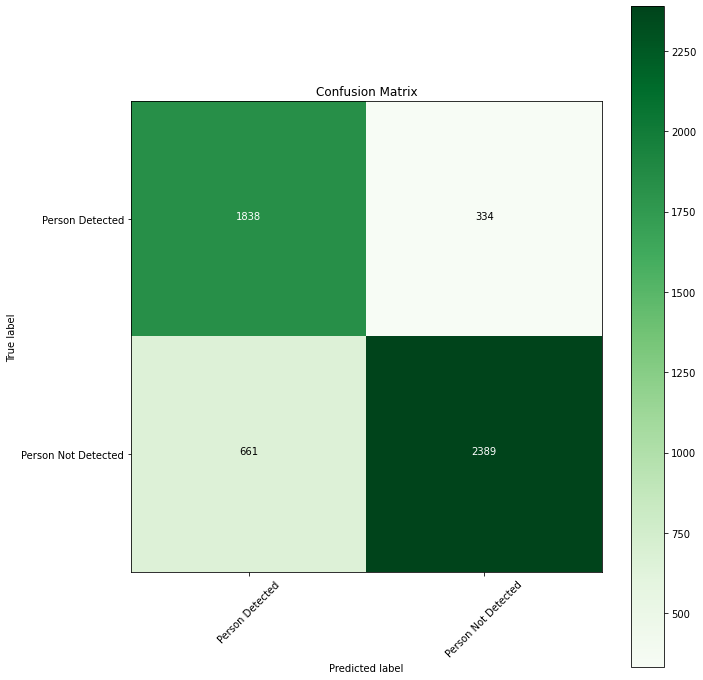

In [ ]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_test, y_pred_KNN)
target_names = ["Person Detected", "Person Not Detected"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_test, y_pred_KNN)


roc_auc_score for KNN:  0.8147516831204903


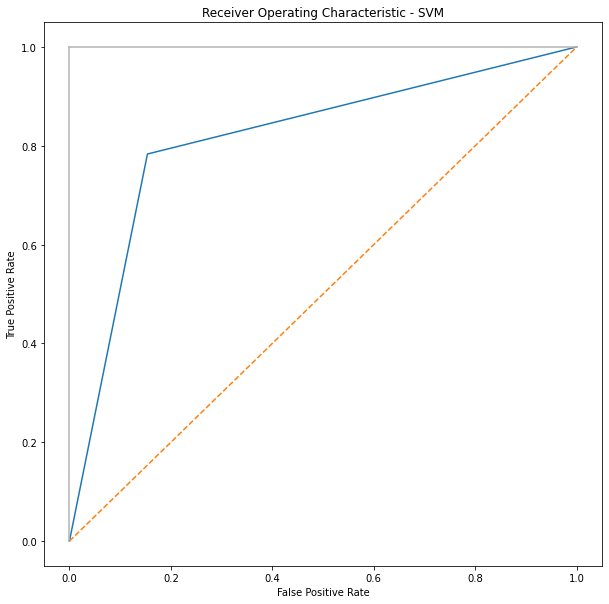

In [ ]:
# plot for KNN
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred_KNN)
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_pred_KNN))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()